## 1. 교차검증

### K폴드

### Stratified K 폴드 (불균형한 분포를 가진 경우)

### GridSearchCV (교차검증과 하이퍼 파라미터 튜닝을 함께)

In [ ]:
## max_depth를 변경하면서 검증 (파이썬 머신러닝 완벽가이드 4-2, p.207)
## GridSearchCV 교차검증 시 max_depth 를 6~24까지 바꿔가는 경우 

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

In [ ]:
## 바로 위에서 검증한 grid_cv의 값을 Dataframe으로 생성 (파이썬 머신러닝 완벽가이드 4-2, p.208)

# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

## cv_results_df의 column 구성 (cv_results_df.columns)
## --> Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
## max_depth와 min_samples_split를 함께 변경하면서 검증하는 case (파이썬 머신러닝 완벽가이드 4-2, p.209)

params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


## 2. 결정트리 모델 기본구문

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11) ## test_size: 20%를 테스트용으로 사용한다는 것

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

### 결정트리의 트리구조를 확인 

In [2]:

## 사이킷런의 트리 모듈은 Graphviz를 이용하기 위해 export_graphviz() 함수를 제공함.
##  export_graphviz()함수는 Graphviz가 읽어들여서 그래프 형태로 시각화 할 수 있는 출력파일을 생성함
## export_graphviz()의 인자로 학습이 완료된 estimator(여기서는 dt_clf), output 파일명, 결정클래스 명칭, 피처 명칭을 입력

from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

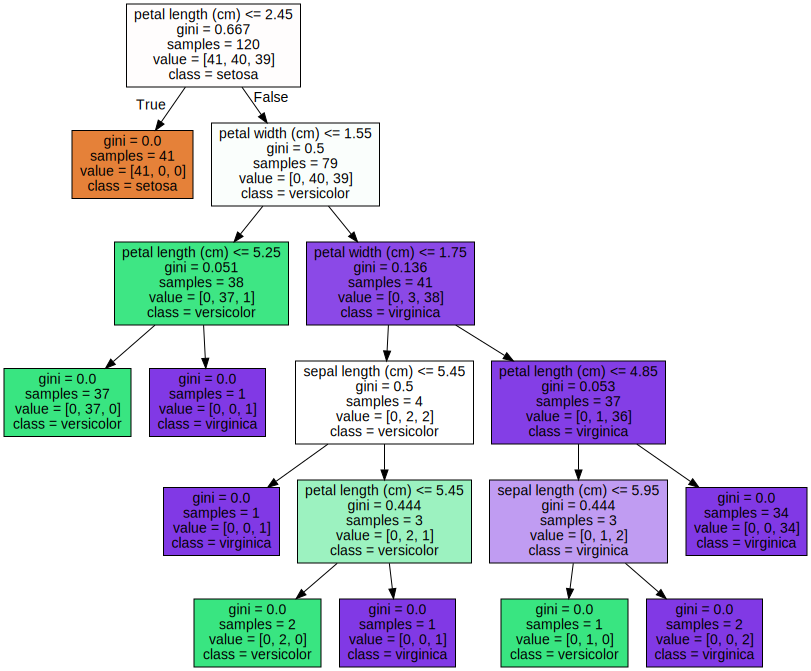

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 (## Executable not found error 발생하여 구글링, graphviz 설치 후 윈도우즈시스템에서 path 추가 후 정상적으로 결과 도출)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## gini계수 : 1-P(A)**2-P(B)**2          <- class 가 1종이면 0, class 2종인 경우 0.5, 0.5의 분포면 0.5로 최대
## class 가 2종 이상인 경우, DecisionTreeClassifier 함수 적용 시 별도 옵션(하이퍼 파라미터)을 통해 제한을 걸지 않으면 모든 class가 1종으로 분류될때까지 진행 - 과적합 발생 가능성 

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot: >

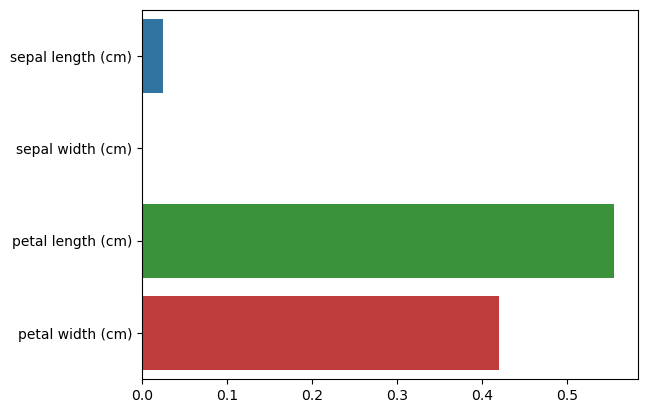

In [4]:
## feature_importance_ : 결정트리 알고리즘이 학습을 통해 규칙을 정하는데 있어 피처의 중요한 역할지표를 표현

import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

## 3. 결정트리 기본구문 + 예측정확도

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

### 하이퍼 파라미터

In [ ]:
## max_depth에 따른 정확도 확인 (파이썬 머신러닝 완벽가이드 4-2, p.209)
## max_depth를 높게 설정함에 따라 정확도가 높아지다가 이후 점점 내려감 (과적합의 영향) 
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

## 4. 앙상블 학습 (Ensemble Learning)

In [ ]:
## 다양한 분류기의 예측결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 획득
### 1.일반적으로 널리 사용: Random Forest, Gradient Boosting Algorithm
### 2.XGBoost 캐글에서 매력적인 솔루션으로 널리 활용
### 3.LightGBM XGBoost 와 유사한 예측성능을 보이면서 빠른 수행속도
### 4.Stacking 여러가지 모델의 결과를 기반으로 메타 모델 수립

In [ ]:
## 앙상블 학습의 유형: 보팅(voting), 배깅(bagging), 부스팅(boosting)  (파이썬 머신러닝 완벽가이드 4-3, p.212)
### 보팅, 배깅: 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
#### 보팅: 서로다른 알고리즘을 가진 분류기를 결합 (예를 들면 전체 데이터를 기반으로 ① Linear Regression, ② K Nearest Neighbor, ③ SVM 의 서로다른 알고리즘으로 학습한 후 예측결과를 가지고 보팅을 통해 최종 예측결과 선택)
##### 하드보팅: 다수결로 판정
##### 소프트보팅: 각 결정확률의 평균값으로 판정 (일반적으로 하드보팅보다 소프트보팅의 예측성능이 우수)
#### 배깅: 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 진행 (Random Forest)
### 부스팅: 여러개의 분류기가 순차적으로 학습을 수행, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행 (그래디언트 부스트, XGBoost, LightGBM)

### 보팅 분류기 Voting Classifier

In [ ]:
## 로지스틱 회귀, KNN 기반으로 보팅분류기 제작
## 위스콘신 유방암 데이터셋 활용 (load_breast_cancer())  (파이썬 머신러닝 완벽가이드 4-3, p.215)

import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' ) ## voting default: hard

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

In [ ]:
## Random Forest 하이퍼 파라미터
### n_estimators: 결정트리의 갯수 지정 (default: 10), 높을수록 성능이 증가하지만(꼭 그런건 아님), 학습 수행시간 증가
### max_features: 결정트리의 max_features와 동일, default: auto(sqrt), 전체 피처가 16개라면 4개를 참조
### 그외 max_depth, min_samples_leaf 등 결정트리와 동일

#### random forest의 하이퍼파라미터 튜닝 (GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)       ## n_jobs: -1 멀티코어 환경에서 모든 CPU를 활용
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

### Gradient Boost Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

In [ ]:
## GBM 하이퍼 파라미터
### n_estimators, max_depth, max_features 는 기존과 동일
### loss: 경사하강법에서 사용하는 비용함수 지정, 특별한 이유가 없으면 default인 'deviance'를 사용
### learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률 (0~1 사이의 값을 지정, default: 0.1), 작으면 최소 오류 값을 찾아 예측성능을 최적화 가능하지만 수행시간이 오래걸림
### n_estimators: weak learner의 갯수로 많을수록 예측성능이 어느정도까지 향상됨 default: 100
### subsample: weak learner 가 학습에 사용하는 데이터의 샘플링 비율 default:1, 과적합 우려 시 1보다 작은 값을 사용

#### GBM의 하이퍼파라미터 튜닝 (GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))